[PMID: 32579974](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7391009/)

[GSE144240](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE144240)

In [1]:
import sys
from pathlib import Path
p_root = Path('~/link/csMAHN_Spatial').expanduser()
sys.path.append(str(p_root)) if not str(p_root) in sys.path else None

In [2]:
from init import *

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-22 22:52:12.789903: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/public/workspace/licanchengup/download/csMAHN_Spatial/dataset/cSCC_GSE144240

LCC 的python 函数库
为实验室留下些什么吧
0.0.1 2024年5月22日10:48:05

import utils as ut
# help(ut)
print(ut.__doc__)
print(ut.__version__)



In [3]:
df = ut.df.iterdir('GSE144240_RAW',path_match='*GSM*')
with Block('df process'):
    df['gsm_id'] = df['name'].str.extract('^(GSM\d+)_',expand=False)
    df['patient'] = df['name'].str.extract('(P\d+)_ST_',expand=False)
    df['repeat'] = df['name'].str.extract('ST_(rep\d+)',expand=False)
    df['format'] = df['name'].str.extract('\.(\w+)\.?g?z?$',expand=False)
    
    df['type'] = ''
    df['type'] = df['type'].mask(df['name'].str.contains('spot_data'),'spot')
    df['type'] = df['type'].mask(df['format'].str.match('jpg'),'img')
    df['type'] = df['type'].mask(df['name'].str.contains('stdata'),'matrix')
    
    df = df.sort_values('gsm_id,patient,repeat,format'.split(','))
    # display(df.head(3))
    df = df.pivot(index='gsm_id,patient,repeat'.split(','),
                  columns = 'type',values='path').reset_index()
    df.columns.name = ''
    _temp = ut.df.apply_merge_field(df,'{patient};{repeat}')
    assert _temp.is_unique,'[Error] not unique'
    df.index = _temp.to_numpy()

df

,gsm_id,patient,repeat,img,matrix,spot
P2;rep1,GSM4284316,P2,rep1,GSE144240_RAW/GSM4284316_P2_ST_rep1.jpg,GSE144240_RAW/GSM4284316_P2_ST_rep1_stdata.tsv.gz,GSE144240_RAW/GSM4284316_spot_data-selection-P...
P2;rep2,GSM4284317,P2,rep2,GSE144240_RAW/GSM4284317_P2_ST_rep2.jpg,GSE144240_RAW/GSM4284317_P2_ST_rep2_stdata.tsv.gz,GSE144240_RAW/GSM4284317_spot_data-selection-P...
P2;rep3,GSM4284318,P2,rep3,GSE144240_RAW/GSM4284318_P2_ST_rep3.jpg,GSE144240_RAW/GSM4284318_P2_ST_rep3_stdata.tsv.gz,GSE144240_RAW/GSM4284318_spot_data-selection-P...
P5;rep1,GSM4284319,P5,rep1,GSE144240_RAW/GSM4284319_P5_ST_rep1.jpg,GSE144240_RAW/GSM4284319_P5_ST_rep1_stdata.tsv.gz,GSE144240_RAW/GSM4284319_spot_data-selection-P...
P5;rep2,GSM4284320,P5,rep2,GSE144240_RAW/GSM4284320_P5_ST_rep2.jpg,GSE144240_RAW/GSM4284320_P5_ST_rep2_stdata.tsv.gz,GSE144240_RAW/GSM4284320_spot_data-selection-P...
P5;rep3,GSM4284321,P5,rep3,GSE144240_RAW/GSM4284321_P5_ST_rep3.jpg,GSE144240_RAW/GSM4284321_P5_ST_rep3_stdata.tsv.gz,GSE144240_RAW/GSM4284321_spot_data-selection-P...
P9;rep1,GSM4284322,P9,rep1,GSE144240_RAW/GSM4284322_P9_ST_rep1.jpg,GSE144240_RAW/GSM4284322_P9_ST_rep1_stdata.tsv.gz,GSE144240_RAW/GSM4284322_spot_data-selection-P...
P9;rep2,GSM4284323,P9,rep2,GSE144240_RAW/GSM4284323_P9_ST_rep2.jpg,GSE144240_RAW/GSM4284323_P9_ST_rep2_stdata.tsv.gz,GSE144240_RAW/GSM4284323_spot_data-selection-P...
P9;rep3,GSM4284324,P9,rep3,GSE144240_RAW/GSM4284324_P9_ST_rep3.jpg,GSE144240_RAW/GSM4284324_P9_ST_rep3_stdata.tsv.gz,GSE144240_RAW/GSM4284324_spot_data-selection-P...
P10;rep1,GSM4284325,P10,rep1,GSE144240_RAW/GSM4284325_P10_ST_rep1.jpg,GSE144240_RAW/GSM4284325_P10_ST_rep1_stdata.ts...,GSE144240_RAW/GSM4284325_spot_data-selection-P...


In [4]:
for i,row in df.iterrows():
    pass

row = df.loc['P10;rep2',:]
row


gsm_id                                            GSM4284326
patient                                                  P10
repeat                                                  rep2
img                 GSE144240_RAW/GSM4284326_P10_ST_rep2.jpg
matrix     GSE144240_RAW/GSM4284326_P10_ST_rep2_stdata.ts...
spot       GSE144240_RAW/GSM4284326_spot_data-selection-P...
Name: P10;rep2, dtype: object

In [5]:
adata = sc.read_csv(row['matrix'],delimiter='\t')
# adata.var["mt"] = adata.var_names.str.match('^MT-',case=False)
# adata.var["ribo"] = adata.var_names.str.match('^RP[SL]',case=False)
# adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]",case=False)
# sc.pp.calculate_qc_metrics(adata, qc_vars='mt,ribo,hb'.split(','),percent_top=[],
#                            log1p=False,inplace=True)
ut.sc.qc(adata)

display(adata.obs.head(2),adata.obs.shape)

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
10x10,349,473.0,19.0,4.016913,53.0,11.205074,0.0,0.0
10x12,309,417.0,10.0,2.398082,40.0,9.592326,0.0,0.0


(1934, 8)

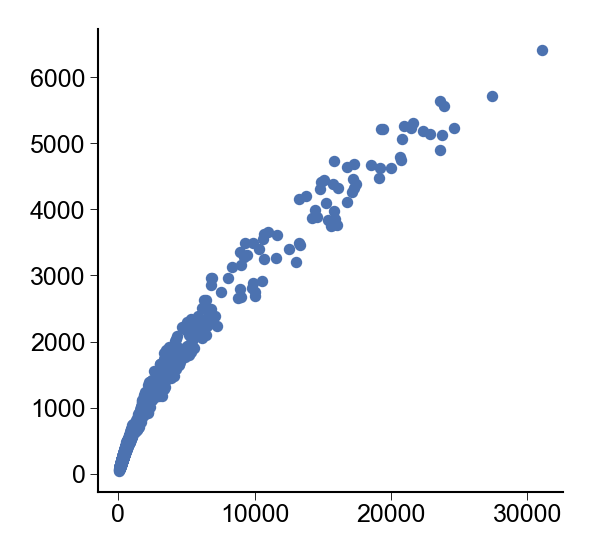

In [6]:
with mpl.rc_context(pl.figure.rc_frame):
    fig,ax = pl.figure.subplots_get_fig_axs()
    ax.scatter('total_counts','n_genes_by_counts',s=5,
               data = adata.obs)

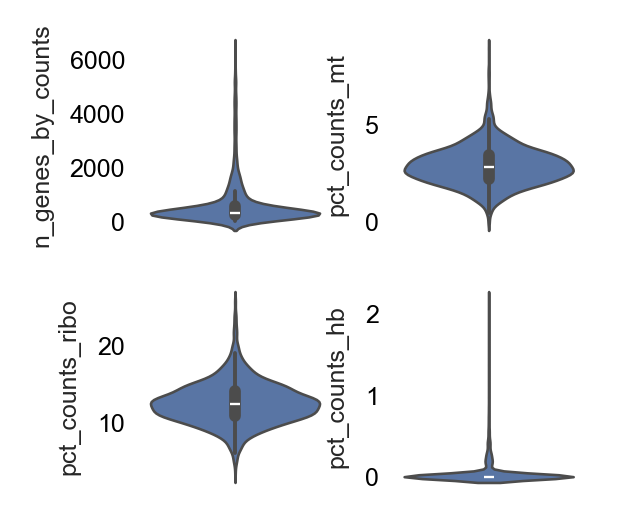

In [7]:
fig,axs = pl.figure.subplots_get_fig_axs(ncols=2,nrows=2,ratio_ncols=1,ratio_nrows=1)
for ax,k in zip(axs,'n_genes_by_counts,pct_counts_mt,pct_counts_ribo,pct_counts_hb'.split(',')):
    sns.violinplot(adata.obs,y=k,ax=ax)
    ax.set_frame_on(False)
fig

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


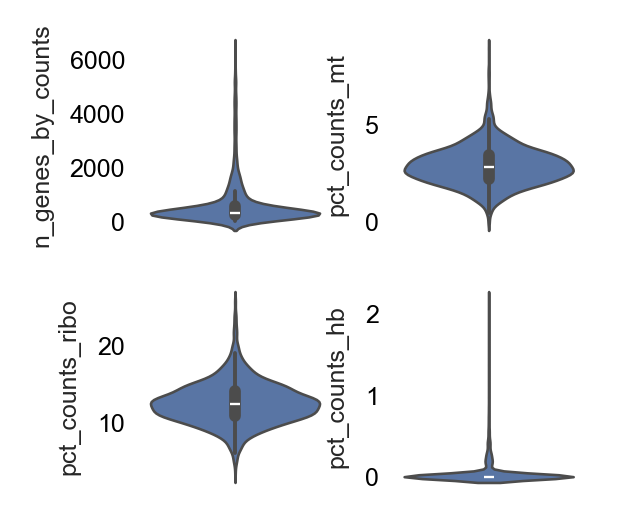

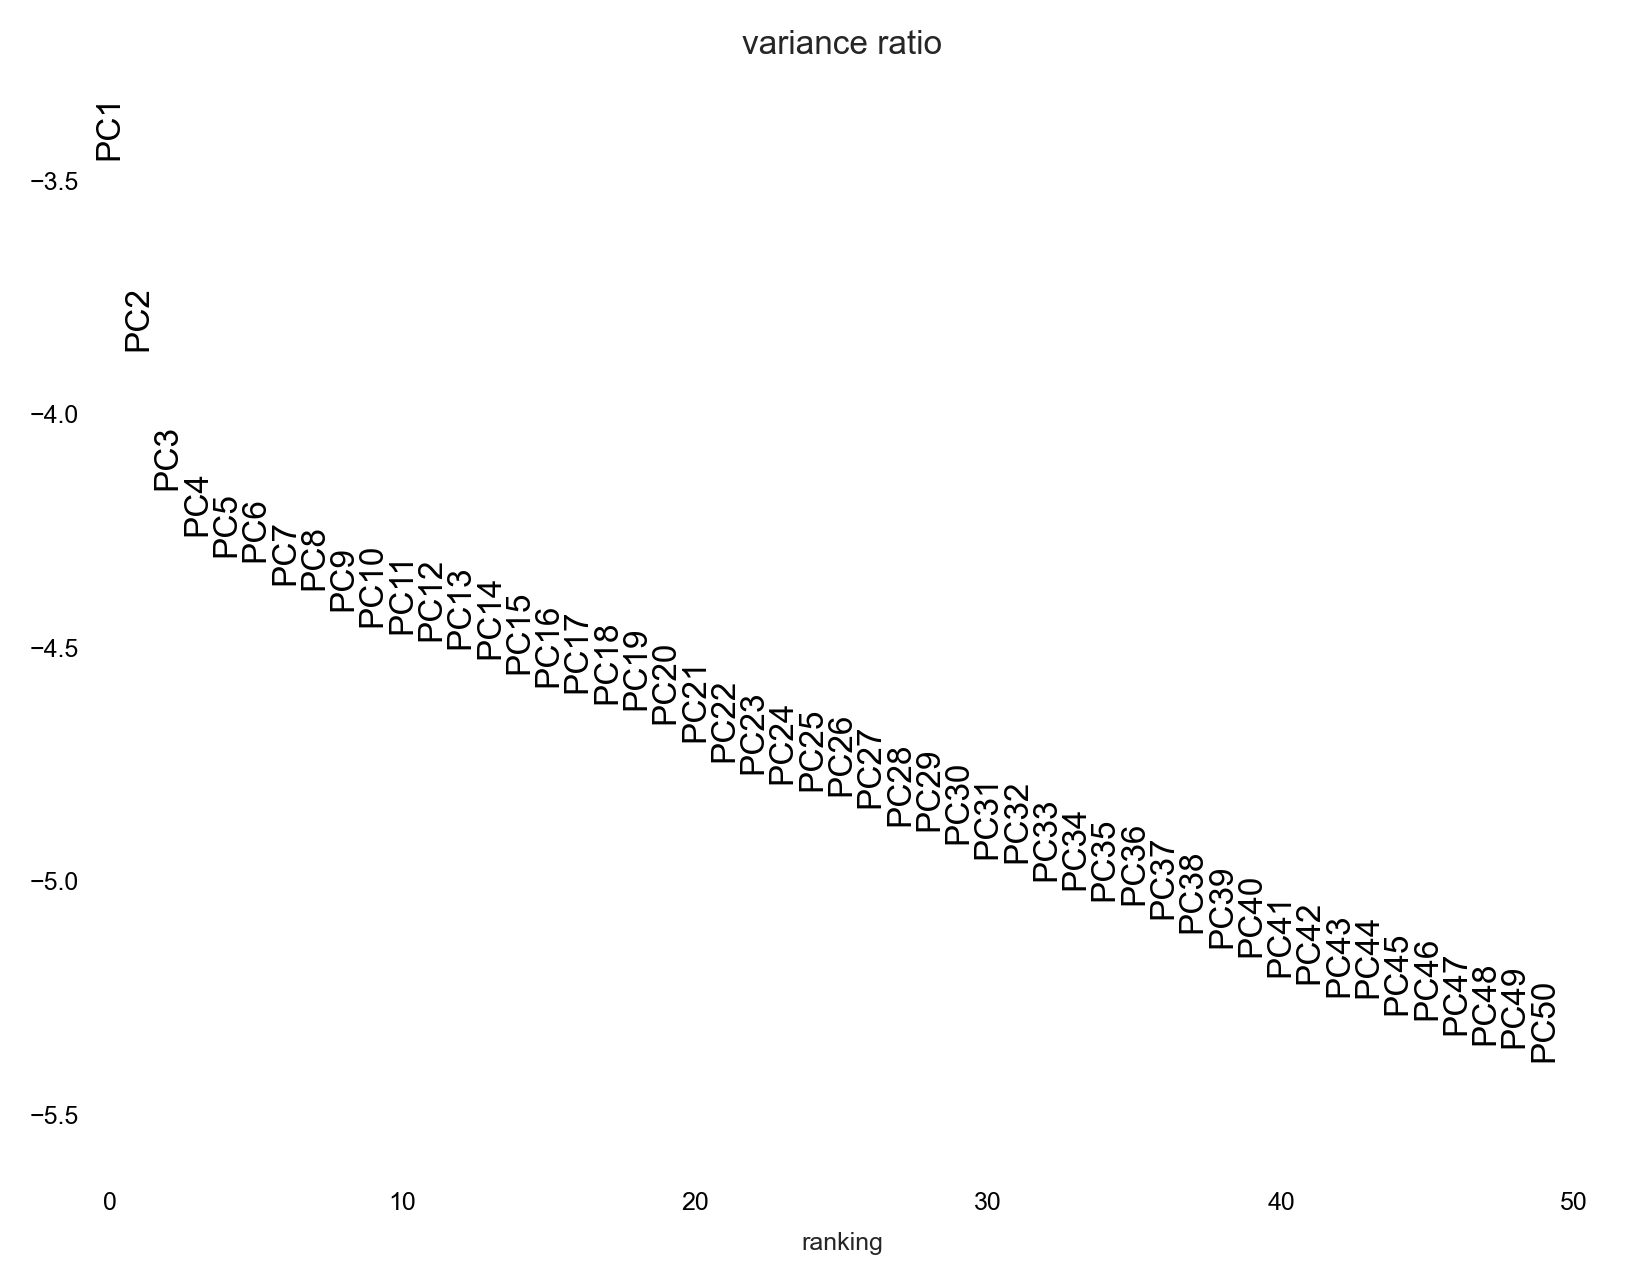

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


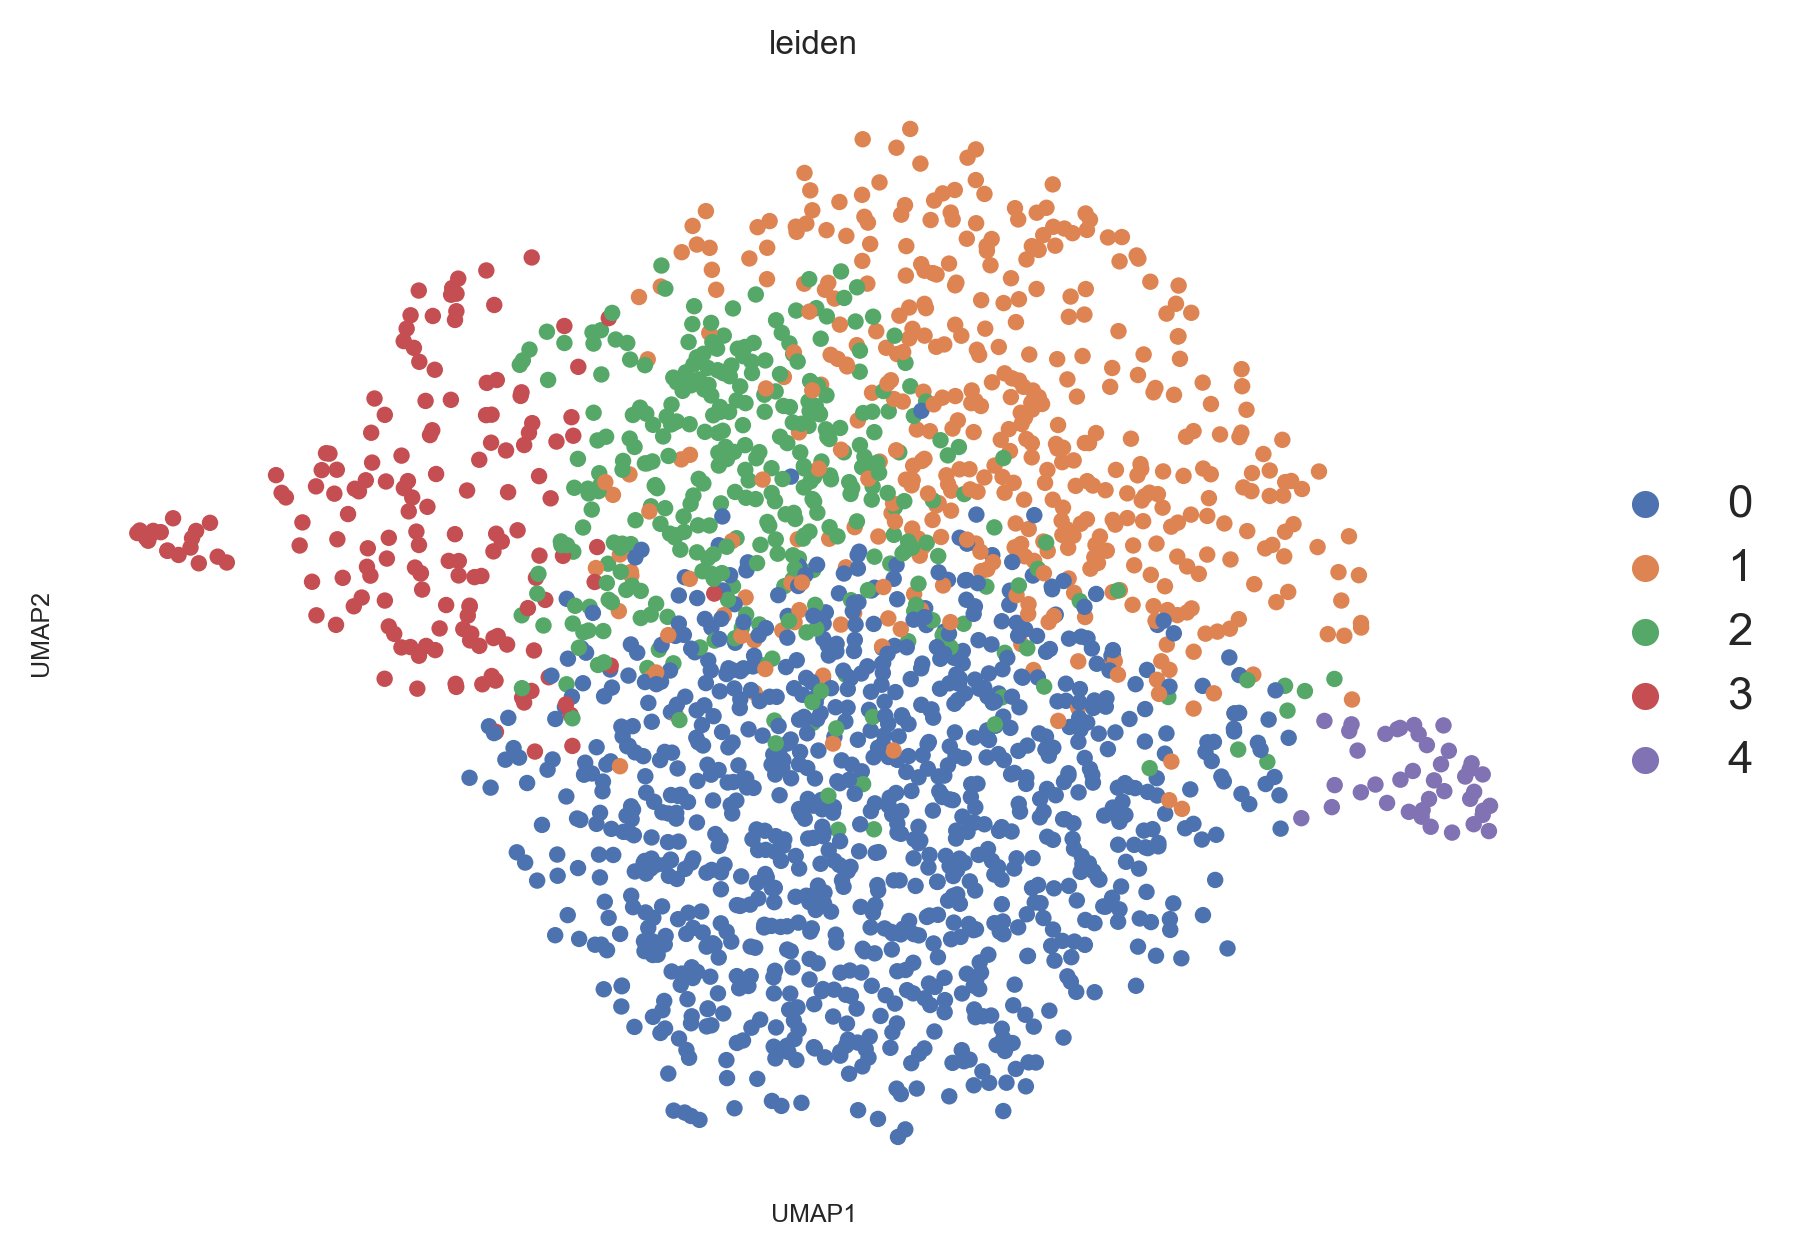

In [8]:
adata = ut.sc.standard_process(adata)